## Overview of Project:

The dataset was gotten from a list of twitter users tweeets. The tweets were categorized into different sentiments which includes Empty, Sadness, Enthusiam, Neutral, Worry, Suprise, Love, Fun, Hate, Happiness, Boredom, Relief, Anger, Joy, Fear, Shame, Disgust.

The Columns of the dataset included the sentiments of the users and their tweet contents.

Upon loading the data, missing values were observed in the Content column. These missing contents makes up less than 1% of the total tweets hence, they were dropped for further analysis of the data.

The value counts of each sentiment was observed hence, it was noted that Neutral, Sadness and Joy were the highest sentiments, that is, it accounted for over 8k of the total sentiments in the dataset.

A New column was created using the TextBlob function of python to further group each sentiment into Positive, Negative or Neutral. It was observed that Joy had more Positive labels, Neutral had the highest Neutral labels and Sadness ahd the highest Negative labels.

The content column was cleaned using neattext functions in python. The neattext is a special function that helps to clean texts by removing, extracting or replacing certain keywords from texts. The neattext function was applied to remove the following: Stopwords, Punctuations, Urls, Html_tags, Userhandles. This created the Cleaned text column to help in the extraction of common Keywords for the top highest sentiments (Neutral, Sadness, Joy).

Machine learning classification algoritms was applied to the dataset. It was observed that Logistic regression was the best algorithm for this dataset as it generated the highest prediction score and accuracy ratio score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neattext.functions as nt
import seaborn as sns
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [2]:
work = pd.read_excel('Emotions analysis.xlsx')
work

sentiment                                            content
0           empty  @tiffanylue i know  i was listenin to bad habi...
1         sadness  Layin n bed with a headache  ughhhh...waitin o...
2         sadness                Funeral ceremony...gloomy friday...
3      enthusiasm               wants to hang out with friends SOON!
4         neutral  @dannycastillo We want to trade with someone w...
...           ...                                                ...
68568     sadness  I forgot to text @KatieDoyle18 back but i thou...
68569     sadness  Almost every month it seems as though some sad...
68570     sadness  @kutzerself so I'm back for like 5 days...work...
68571         joy   I ’ m looking at my horoscope for this month ...
68572       anger                                 One day I had an a

[68573 rows x 2 columns]

In [3]:
work.shape

(68573, 2)

In [4]:
work_info=pd.DataFrame(work.isnull().sum()).T.rename(index={0:'NAN'})
work_info=work_info.append(pd.DataFrame(work.isnull().sum()/work.shape[0]*100).T.rename(index={0:'%'}))
display(work_info)

/var/folders/8b/kkkpgdnj67b5dwwdyvf1_5tc0000gn/T/ipykernel_1420/12976625.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  work_info=work_info.append(pd.DataFrame(work.isnull().sum()/work.shape[0]*100).T.rename(index={0:'%'}))


sentiment     content
NAN        0.0  655.000000
%          0.0    0.955186

In [5]:
work.dropna(axis = 0, subset = ['content'], inplace = True)

In [6]:
work_info=pd.DataFrame(work.isnull().sum()).T.rename(index={0:'NAN'})
work_info=work_info.append(pd.DataFrame(work.isnull().sum()/work.shape[0]*100).T.rename(index={0:'NAN%'}))
display(work_info)

/var/folders/8b/kkkpgdnj67b5dwwdyvf1_5tc0000gn/T/ipykernel_1420/4164501043.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  work_info=work_info.append(pd.DataFrame(work.isnull().sum()/work.shape[0]*100).T.rename(index={0:'NAN%'}))


sentiment  content
NAN         0.0      0.0
NAN%        0.0      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

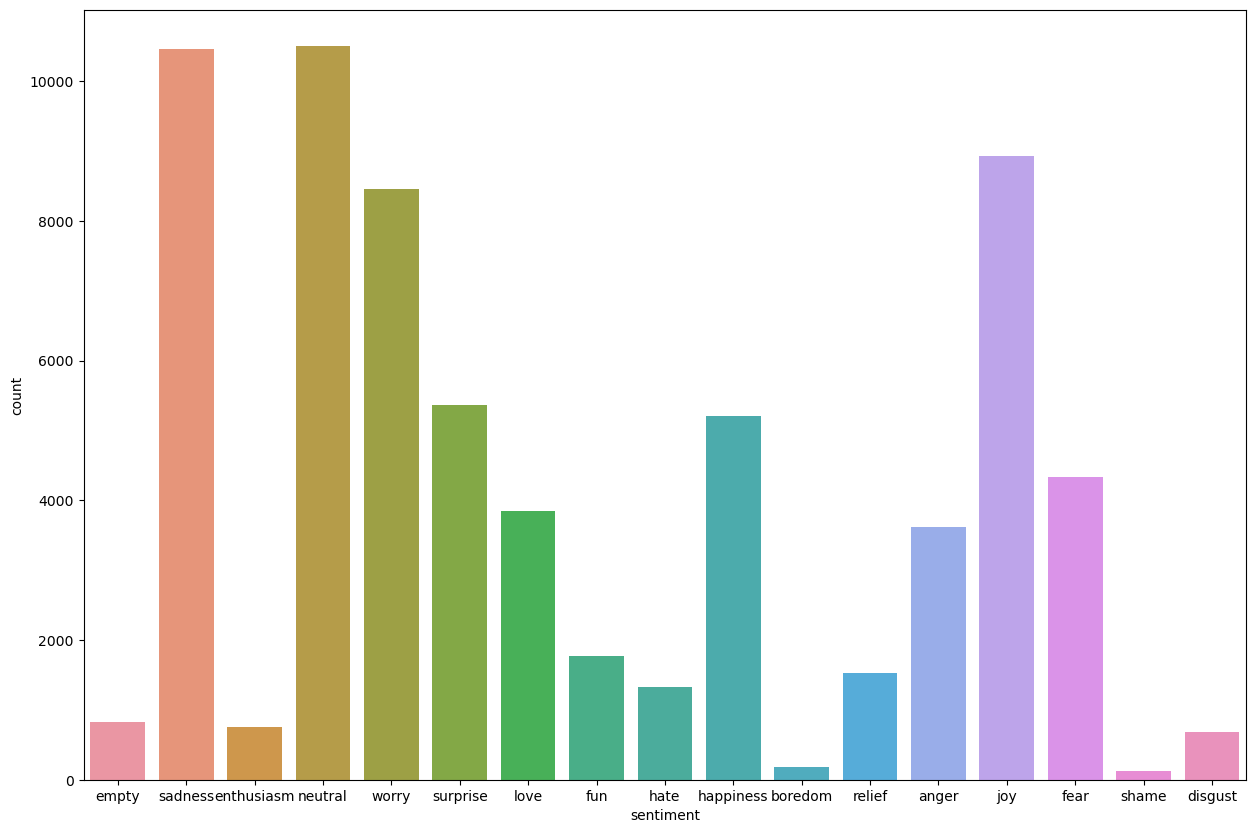

In [7]:
# using seaborn to plot
plt.figure(figsize=(15, 10))
sns.countplot(x='sentiment', data=work)
plt.show

In [8]:
work['content'] = work['content'].astype(str)

In [9]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = 'Positive'
    elif sentiment < 0:
        result = 'Negative'
    else:
        result = 'Neutral'
    return result

In [10]:
get_sentiment('His performance is below average')

'Negative'

In [11]:
work['sentiment_label'] = work['content'].apply(get_sentiment)

In [12]:
work.head(11)

sentiment                                            content  \
0        empty  @tiffanylue i know  i was listenin to bad habi...   
1      sadness  Layin n bed with a headache  ughhhh...waitin o...   
2      sadness                Funeral ceremony...gloomy friday...   
3   enthusiasm               wants to hang out with friends SOON!   
4      neutral  @dannycastillo We want to trade with someone w...   
5        worry  Re-pinging @ghostridah14: why didn't you go to...   
6      sadness  I should be sleep, but im not! thinking about ...   
7        worry               Hmmm. http://www.djhero.com/ is down   
8      sadness            @charviray Charlene my love. I miss you   
9      sadness         @kelcouch I'm sorry  at least it's Friday?   
10     neutral                                   cant fall asleep   

   sentiment_label  
0         Negative  
1          Neutral  
2          Neutral  
3         Positive  
4          Neutral  
5          Neutral  
6         Positive  
7         Negative  
8         Positive  
9         Negative  
10         Neutral

In [13]:
work.groupby(['sentiment', 'sentiment_label']).size()

sentiment   sentiment_label
anger       Negative           1498
            Neutral            1174
            Positive            944
boredom     Negative             80
            Neutral              56
            Positive             43
disgust     Negative            267
            Neutral             196
            Positive            227
empty       Negative            168
            Neutral             418
            Positive            241
enthusiasm  Negative            100
            Neutral             254
            Positive            405
fear        Negative           1211
            Neutral            1491
            Positive           1626
fun         Negative            205
            Neutral             474
            Positive           1097
happiness   Negative            345
            Neutral            1224
            Positive           3640
hate        Negative            694
            Neutral             365
            Positive            265


In [14]:
work['content'].sample(51)

6953     It looks like the office TV DOES get MLB Netwo...
41495    The zombies in the upcoming World War Z film r...
13120    @welsh_lottie Not one of my favourite pastimes...
5082     @DonnieWahlberg Hi Donnie today i want 2 hear ...
32609    @XKirstyxo haha  I love Dnt Regret It Now with...
60129    I am going to ur country the next year ARE U R...
44308    That new thing he does... he learned it from t...
67484    One night, at a friend's place I realized that...
30406    @girlonlaptop haha. not sure what local is to ...
36841    @MaxizPad hahaha! Guess you will have to reinf...
33837    Orange/Pineapple/Banana smoothie after a very ...
43931                                            I know . 
986            Phone will die soon. What to do now? Oh no!
9572                             Misses the good old days!
42967    Don’t forget for the next 13 days tell us what...
45313    is  power. A beaten dog may you, but the secon...
49726    Guys that are married &amp; still act like the.

In [15]:
dir(nt)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [16]:
work['content_cleaned'] = work['content'].apply(nt.remove_stopwords)

In [17]:
work['content_cleaned']= work['content_cleaned'].apply(nt.remove_userhandles)

In [18]:
work['content_cleaned'] = work['content_cleaned'].apply(nt.remove_punctuations)

In [19]:
work['content_cleaned'] = work['content_cleaned'].apply(nt.remove_urls)

In [20]:
work['content_cleaned'] = work['content_cleaned'].apply(nt.remove_html_tags)

In [21]:
work['content_cleaned'] = work['content_cleaned'].apply(nt.remove_userhandles)

In [22]:
work.sample(40)

sentiment                                            content  \
23240      worry  i  miss my boyfriend so much like you don't ev...   
67962       fear  If I said I nothing, I'd be a lying. I'm death...   
50335   surprise  ended up being front row for four year strong,...   
18071    neutral  @ElZorro: &quot;&quot;UB40-&quot;Bring Me Your...   
12184      empty  Took a short nap now Im ready for work. My sun...   
57885        joy  @WafaFt let's just say next week 3 finals and ...   
57902   surprise  @RobynLynnGreen I won't read it if you don't! ...   
30475    sadness  Yeahh cenare lo mismo qe Rosher! ok ok Roger  ...   
36229       love     @demiswissfan love you 2  so how are you? xxxx   
17795      empty          Trader Joe's &quot;sushi&quot; is a fail.   
8239     sadness                               Shoot. Only 12 miles   
21995  happiness  Weather is lovely, I'm headed home via superma...   
19785    neutral                                I gots the sniffles   
35658    neutral        Almost dere  really tired eyes r really dry   
4751     neutral         @unloveablesteve Morrissey cancelled on me   
32627       love  @Alyssa_Milano hahaha i love how u threw in th...   
40239   surprise  @mylan4 ik wou jou heel persoonlijk benoemen, ...   
42698    sadness         Could happily die but wouldn't die happy.    
59530       fear     The main reason girls can't keep a good nigga    
3309     sadness                          At school, it's so boring   
2683     neutral  @Phoebo yeah....but I finish go home get chang...   
23647  happiness                       Im really excited! cant wait   
24947    neutral  Facebook Group: World Leaders  http://www.thea...   
43513        joy  ...someone but a little ball in the net hopefu...   
8395        love  Beautiful day on Ocracoke just hope the thunde...   
35391      worry              @nikki_78 yes i have to agree it does   
41663       fear  After a basketball, shower and beer run-break,...   
53838    sadness  Just left my mom at work now driving home list...   
45837    sadness  @sarahweissy I don't think we have had a conve...   
52367        joy  Joy goes against the foundations of mathematic...   
16559      worry  @hatz94 Nooooo get on now! Haha i'll be gone l...   
27510      worry  @markhoppus not cool, Mark, this song is going...   
16484    sadness  Roxie is not feeling very well  http://apps.fa...   
15923    neutral       shakalohana week two of flat wavez no surfin   
37688      worry  It's just a click without subscription needed ...   
53986        joy  Good morning Twitterland!  Its  Furday.  Sendi...   
54188      anger  A colleague asked me for some advice and as he...   
48380   surprise  From the outset , commentators seem to have be...   
1956     sadness  very disappointed in him    gonna have to slee...   
2267     neutral  Eating pringles at nearly 1 AM really reminds ...   

      sentiment_label                                    content_cleaned  
23240        Positive   miss boyfriend like know / 2 hours ill oval face  
67962        Negative  said nothing Id lying Im deathly afraid grown ...  
50335        Positive                    ended row year strong got doors  
18071         Neutral    quotquotUB40quotBring Cupquotquotquot  http:...  
12184        Positive        Took short nap Im ready work sun burn hurts  
57885        Negative                 lets week 3 finals assignments due  
57902        Positive                                     read dont Haha  
30475        Positive   Yeahh cenare lo mismo qe Rosher ok ok Roger wiii  
36229        Positive                                    love 2 you xxxx  
17795        Negative                     Trader Joes quotsushiquot fail  
8239          Neutral                                     Shoot 12 miles  
21995        Positive  Weather lovely Im headed home supermarket Plan...  
19785         Neutral                                      gots sniffles  
35658        Negative                        

### Extracting common keywords for each sentiment:

In [23]:
def keywords(text, num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [24]:
sentiment_list = work['sentiment'].unique().tolist()
sentiment_list

['empty',
 'sadness',
 'enthusiasm',
 'neutral',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'happiness',
 'boredom',
 'relief',
 'anger',
 'joy',
 'fear',
 'shame',
 'disgust']

### Plotting Wordcloud for sentiment:

Using wordcloud to plot the top 3 highest sentiments with their respective label size

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


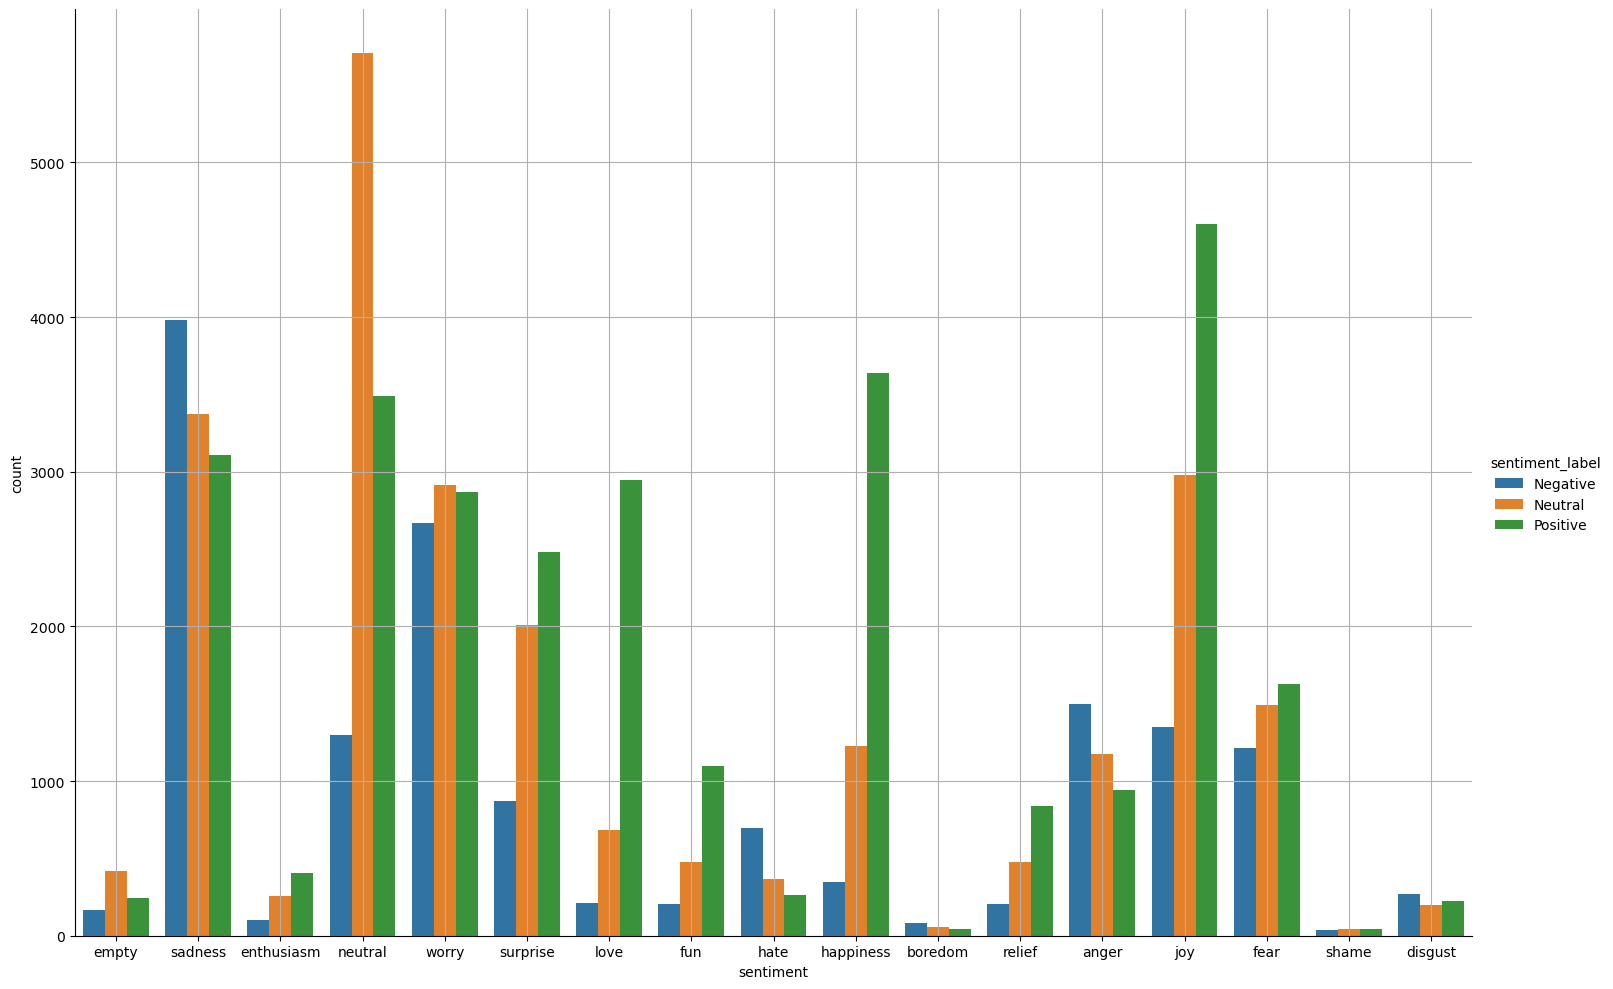

In [25]:
sns.factorplot(x='sentiment', hue='sentiment_label', data=work, kind='count', size=10, aspect=1.5)
plt.grid(True)

From the plot above, sadness, neutral and joy top the sentiments with respect to their labels

In [26]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud, interpolation = 'bilinear')
    plt.show()

In [27]:
neutral_document = ' '.join(work[work['sentiment'] == 'neutral']['content_cleaned'].tolist())
neutral_document

'  want trade Houston tickets will cant fall asleep Topic Maps talks Balisage Markup Conference 2009 Program online http://trim/mL6Z (via   #topicmaps   cant sleep missed bl***y bus feels strong contractions wants out http://plurkcom/p/wxidk SoCal stoked maybe not tomorrow Screw   3 weeks work afternoon   Aw unfollow you cry   oh noooo blow tire reaaaally going send batman smoke wnna bath Chocolate milk better straw lack said straw   time diff ive wrapped day day stuff havent tweeting talk soonmust sleepup 6hrs   way damn sucks B ok   recession hotel restructuring accounts done adds bit pressure short term well cope   got dibs Sulu home cant   bday nudges Brothers Bloom opening weekend El Paso Ill buy Brick enjoy watch Brothers Bloom says miss plurking http://plurkcom/p/wxion miss Voobys   ELP mix dentist appt afternoon rescheduled tomorrow @ 9am   whats going sweetheart freaking difficult systemwide spellchecker Shit Id settle office suite one Stupid unhelpful Windows   work 6am Gotta

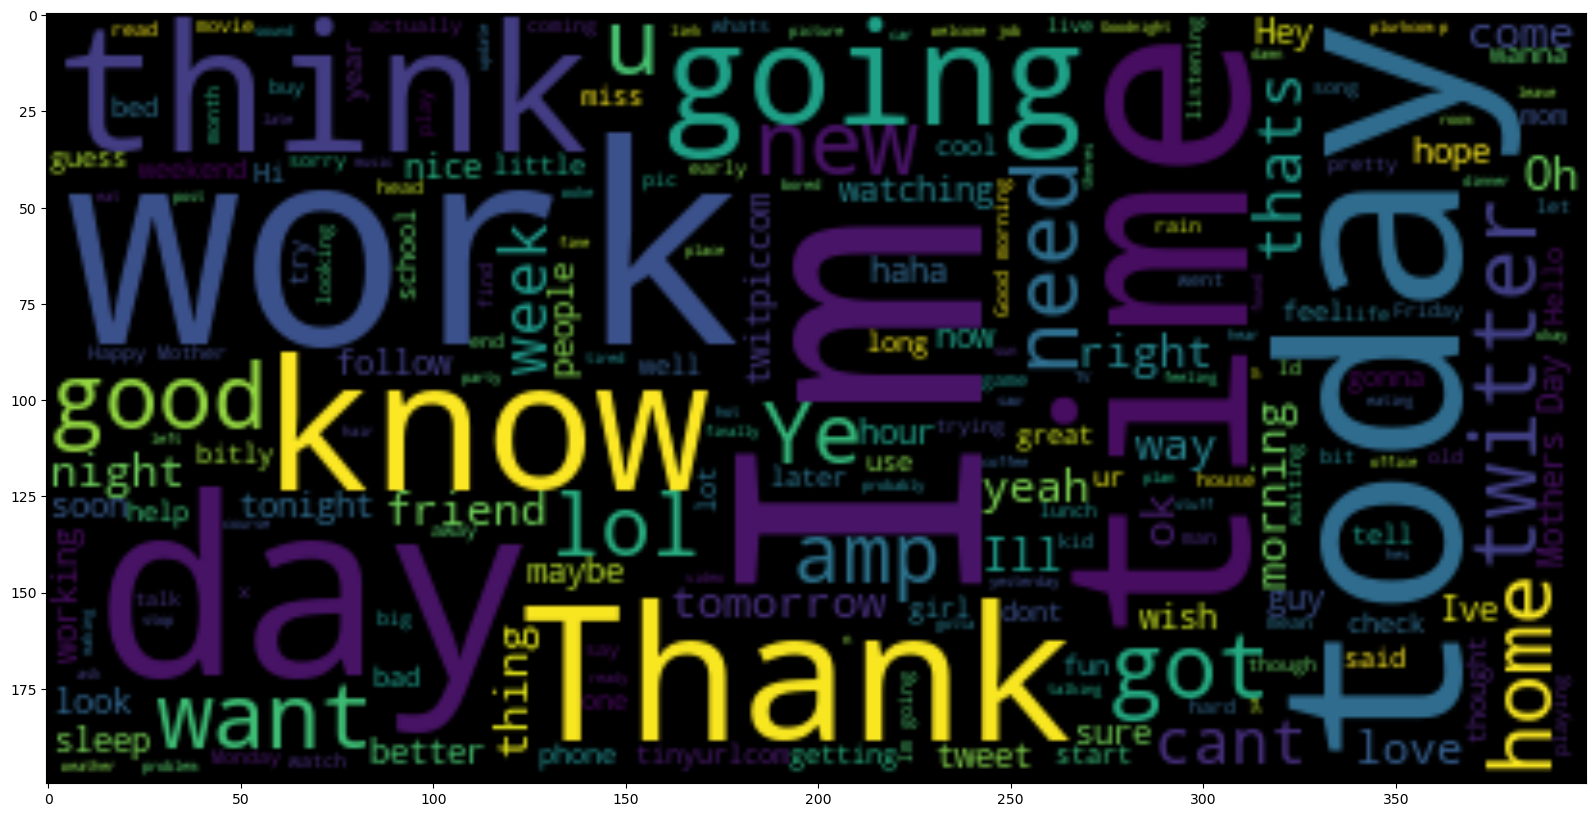

In [28]:
plot_wordcloud(neutral_document)

In [29]:
sadness_document = ' '.join(work[work['sentiment'] == 'sadness']['content_cleaned'].tolist())
sadness_document

'Layin n bed headache ughhhhwaitin call Funeral ceremonygloomy friday sleep im not thinking old friend want hes married now damn amp wants 2 scandalous   Charlene love miss   Im sorry Friday Ugh beat stupid song rude   u watch hills london u realise tourture weeks weeks late watch itonlinelol storm electricity gone sleepy late fail again convinced wanted you signals offdamn think lost friend tired think im definitely going ear infection going bed quotearlyquot once   im sorry people rude you isaac manners know better lewd Fudge BSd paper tired Ugh hate school time sleep   yeah :S feel funny cause slept woke mum cause singing impressed :S you Im problem photo twitter amfcant face   Aww Onward upwards now yay sad leave bet diesel yaris 70mpg sad available US Thatd awesome want buy great album unfortunately dont hav enuff funds quotlong time noisyquot   honestypain blech Ok  passengers  alive  theyre dead  know til end  cry      fell asleep beach sunscreen lol   ohh thursday exams day wed

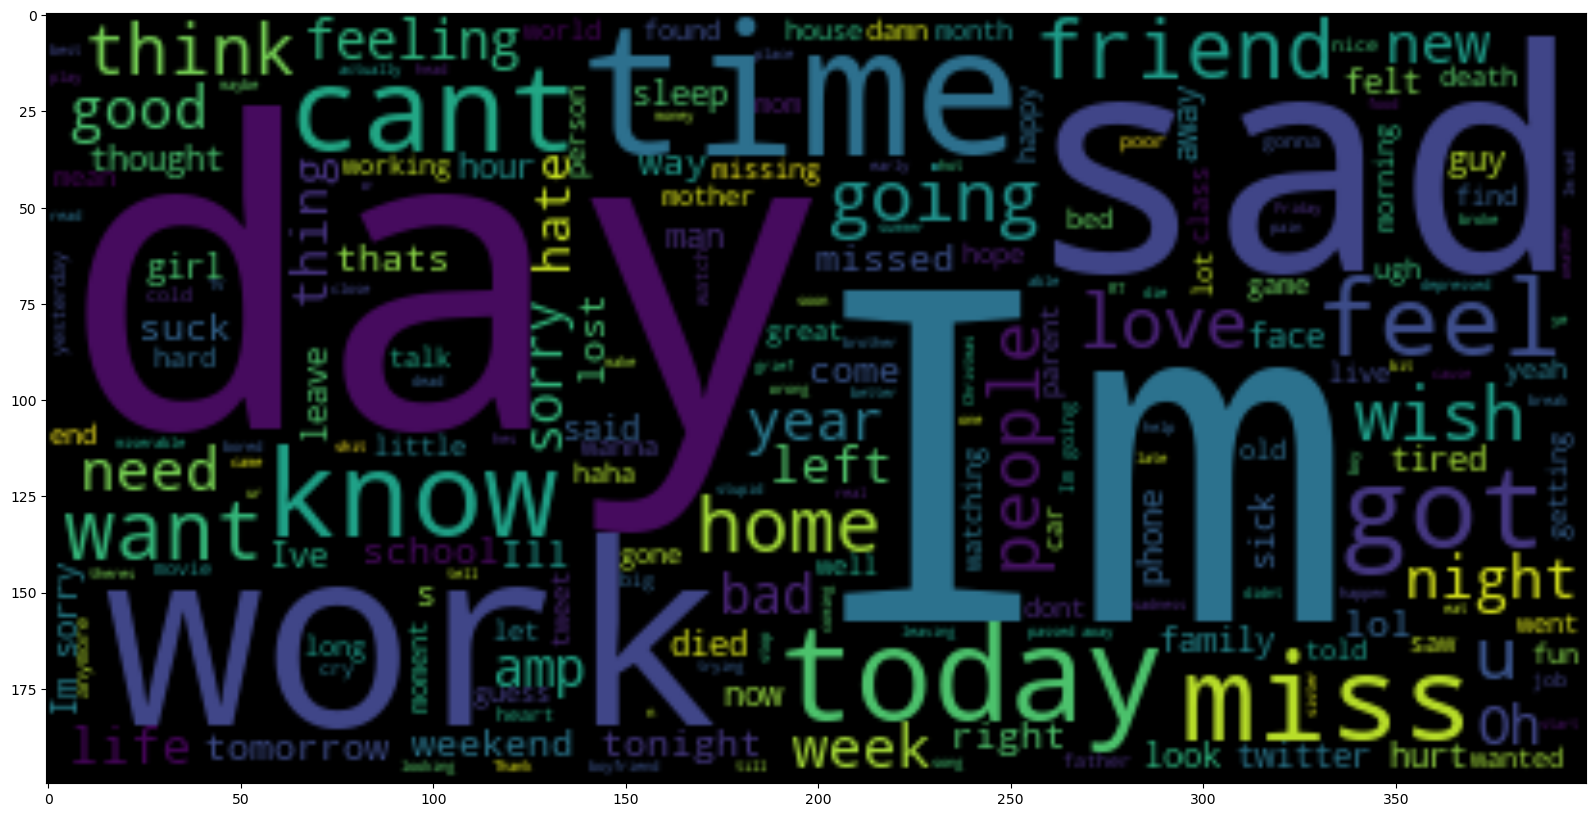

In [30]:
plot_wordcloud(sadness_document)

In [31]:
joy_document = ' '.join(work[work['sentiment'] == 'joy']['content_cleaned'].tolist())
joy_document

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

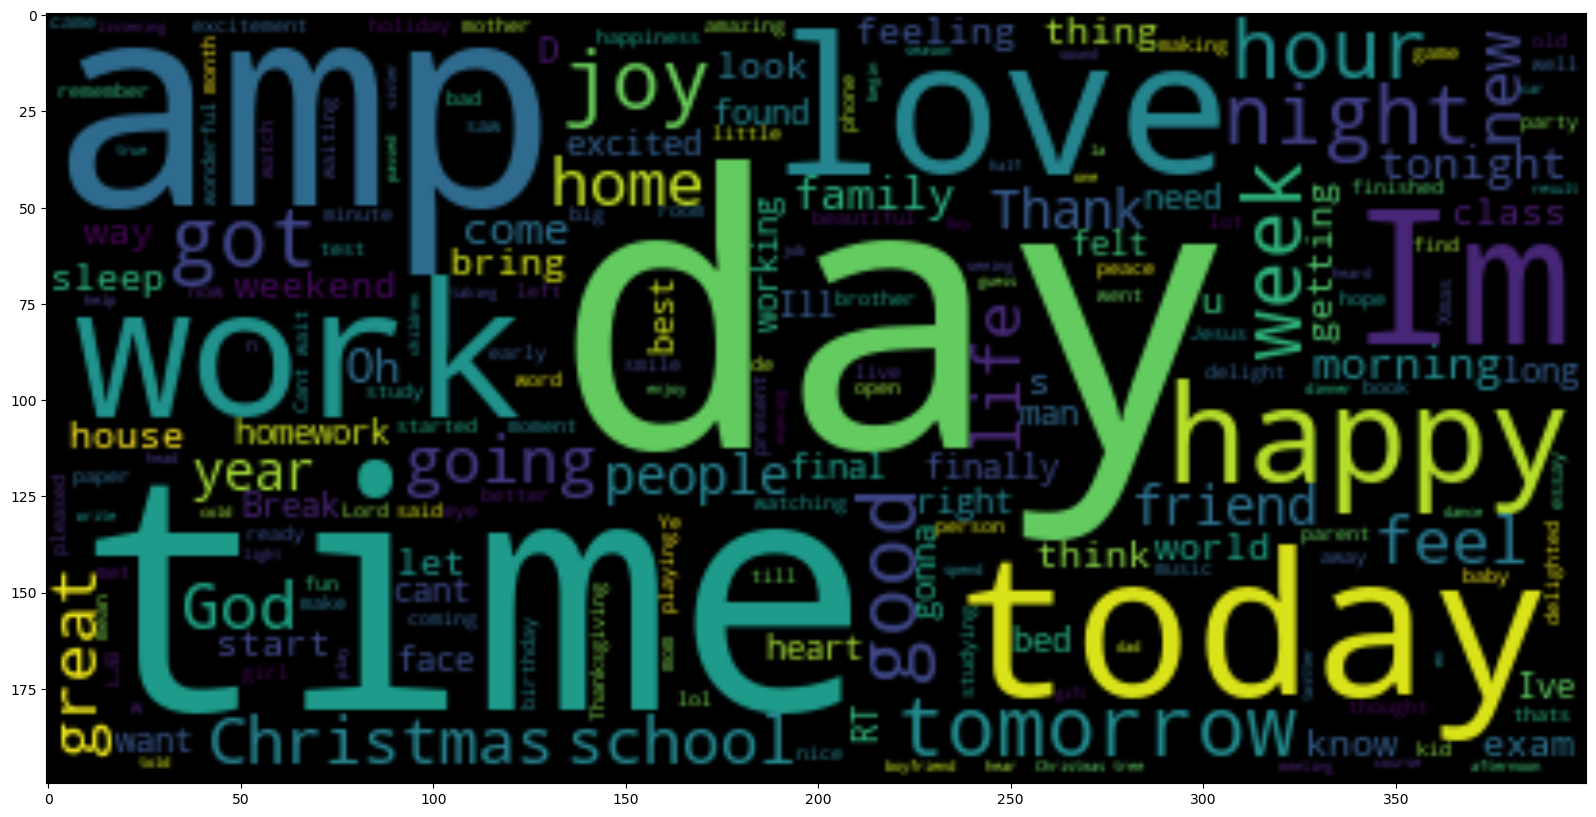

In [32]:
plot_wordcloud(joy_document)

In [33]:
anger_document = ' '.join(work[work['sentiment'] == 'anger']['content_cleaned'].tolist())
anger_document

'fuckinm transtelecom Working Fridaaaayyyyy Packing like it tried dye hair got blond chunk middle hair Dang quotlocked abroadquot makes bein half brown good risk mgmt travelin 3rd world blend feel sorry hostage magnet white pepo   damned hordies   yes boo soar throats earaches stomach EXPLODE wendys tastes good bad you   Hey Wahts happening #coffeclub didnt coffee days   historical Jesus exist Im finding hard prove hearsay accounts  bugs  lost files high school hav chance win $10 $100 $1000 given free $ planthave wait till plant grow know anythin knew dentention hard 2   want come come JEEEEEZ   Demon Sam need numb pain xXx   awh thats good better soon stuck stupid Jeuno flag up Wish Windy fishing   ack read thats horrible accounting taste   Oh let clarifyknow lots nice people live there thought breeding ground 4 BNP Confuzzled toaster oven fault Im going look like idiot father   smh whin comment   u serious touched arse ohmygod u bitch lol aaaaawwwwwww u tell that   Link ff quothow wo

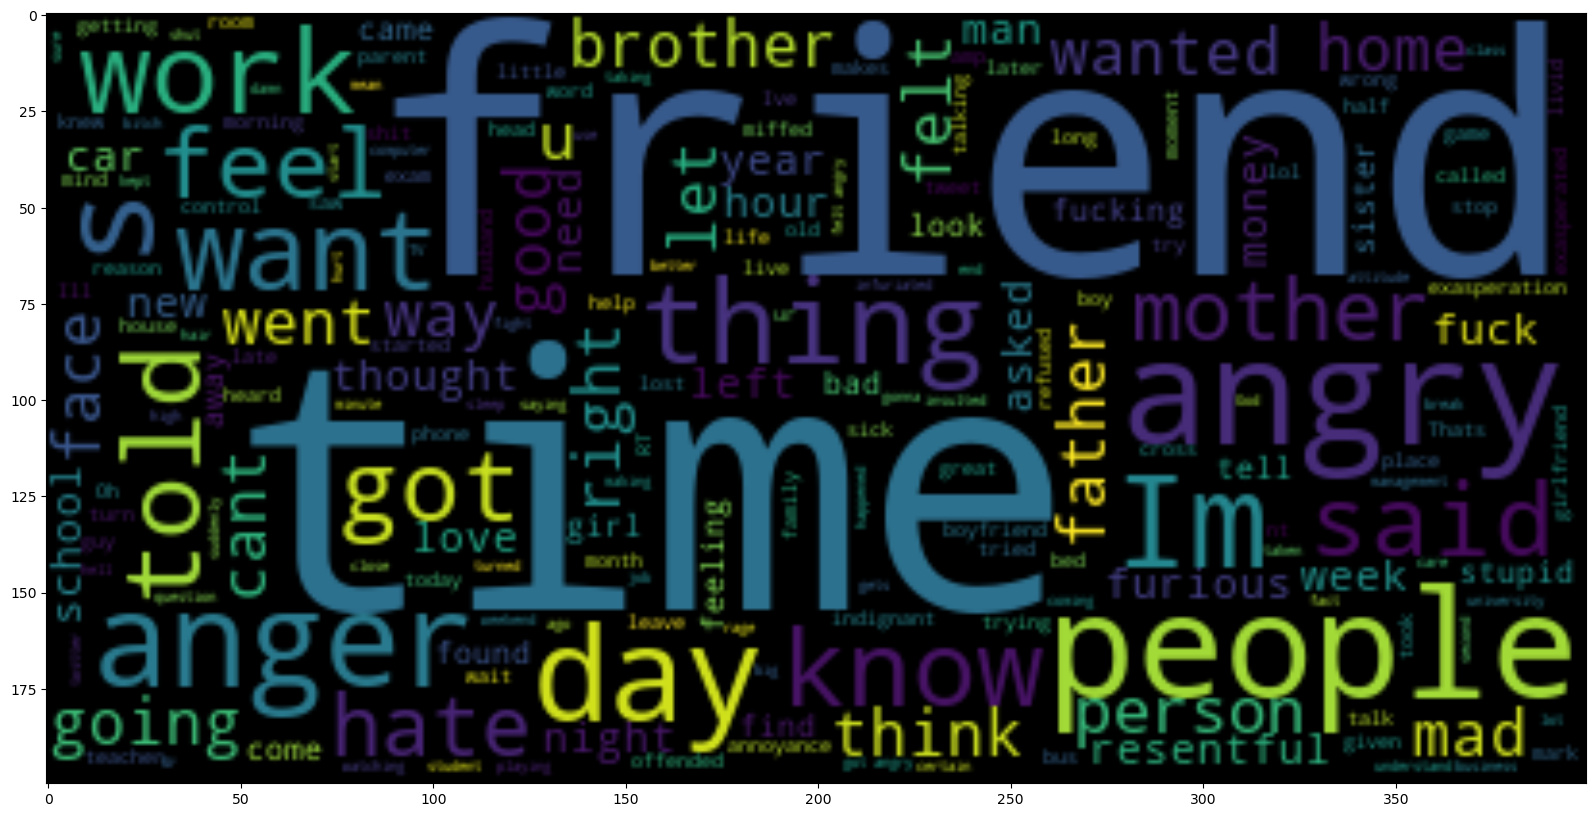

In [34]:
plot_wordcloud(anger_document)

## Machine Learning:
In this Project, Classification algorithms are to be used. The types of Classification are:
* Logistic regression Algorithm
* KNN Algorithm
* Support Vector Machine

#### Encoding Categorical Data

In [35]:
X = work['content_cleaned']
y = work['sentiment']

In [36]:
cv = CountVectorizer()
x = cv.fit_transform(X)

In [37]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [39]:
x_train

<47542x55529 sparse matrix of type '<class 'numpy.int64'>'
	with 330263 stored elements in Compressed Sparse Row format>

In [40]:
y_train

335        worry
20579       love
41349    sadness
13848      worry
32676        fun
          ...   
42037        joy
21243    sadness
46039        joy
42673        joy
43651        joy
Name: sentiment, Length: 47542, dtype: object

In [41]:
x_test

<20376x55529 sparse matrix of type '<class 'numpy.int64'>'
	with 141535 stored elements in Compressed Sparse Row format>

In [42]:
y_test

28574       neutral
36326       neutral
58447         anger
21321    enthusiasm
3740        boredom
            ...    
64182           joy
21706     happiness
17625         empty
13466         worry
25731          love
Name: sentiment, Length: 20376, dtype: object

### Logistic Regression

In [43]:
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(x_train, y_train) 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [44]:
lr_sample = ['She is in love with her husband']
transform_sample = cv.transform(lr_sample).toarray()

In [45]:
lr_classifier.predict(transform_sample)

array(['love'], dtype=object)

In [46]:
lr_classifier.score(x_test, y_test)

0.39610325873576757

In [47]:
def sentiment_prediction(lr_sample,model):
    point = cv.transform(lr_sample).toarray()
    prediction = model.predict(point)
    prediction_probability = model.predict_proba(point)
    prediction_percentage = dict(zip(model.classes_,prediction_probability[0]))
    print('prediction:{}, prediction Score:{}'.format(prediction[0],np.max(prediction_probability)))
    return prediction_percentage

In [48]:
sentiment_prediction(lr_sample, lr_classifier)

prediction:love, prediction Score:0.3583519102722424


{'anger': 0.023679210037276802,
 'boredom': 0.004081147207621606,
 'disgust': 0.0019654155972109308,
 'empty': 0.015933374157633386,
 'enthusiasm': 0.008091192566901736,
 'fear': 0.02399714609692437,
 'fun': 0.007076461894521004,
 'happiness': 0.06878090344088317,
 'hate': 0.015215406607424237,
 'joy': 0.1299827386715458,
 'love': 0.3583519102722424,
 'neutral': 0.018719504938094,
 'relief': 0.0100519046808196,
 'sadness': 0.24503505641919468,
 'shame': 9.699712864366452e-05,
 'surprise': 0.01851902254319128,
 'worry': 0.050422607739871415}

In [49]:
sentiment_prediction(['He is scared of his exams'],lr_classifier)

prediction:fear, prediction Score:0.46268601515383334


{'anger': 0.003195752401009791,
 'boredom': 0.0009947550749917818,
 'disgust': 0.0038328670116787597,
 'empty': 0.010929536989800632,
 'enthusiasm': 0.002661052211003979,
 'fear': 0.46268601515383334,
 'fun': 0.0066992698484415305,
 'happiness': 0.006336700123784639,
 'hate': 0.00545686589778839,
 'joy': 0.02162073083092552,
 'love': 0.017719109884268794,
 'neutral': 0.06220995611211281,
 'relief': 0.003383057404200754,
 'sadness': 0.06217138606794827,
 'shame': 0.0001359656248838014,
 'surprise': 0.009678521752560214,
 'worry': 0.3202884576107671}

In [50]:
lr_y_pred = lr_classifier.predict(x_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_pred))

              precision    recall  f1-score   support

       anger       0.60      0.45      0.51      1085
     boredom       0.00      0.00      0.00        56
     disgust       0.51      0.11      0.18       227
       empty       0.00      0.00      0.00       245
  enthusiasm       0.00      0.00      0.00       228
        fear       0.71      0.59      0.65      1271
         fun       0.10      0.03      0.05       523
   happiness       0.30      0.24      0.27      1590
        hate       0.27      0.11      0.16       412
         joy       0.48      0.55      0.51      2708
        love       0.41      0.34      0.37      1201
     neutral       0.34      0.60      0.43      3091
      relief       0.13      0.04      0.06       434
     sadness       0.42      0.47      0.44      3207
       shame       0.77      0.62      0.69        32
    surprise       0.36      0.27      0.30      1595
       worry       0.28      0.27      0.27      2471

    accuracy              

#### Confusion Matrix for Logistic regression

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


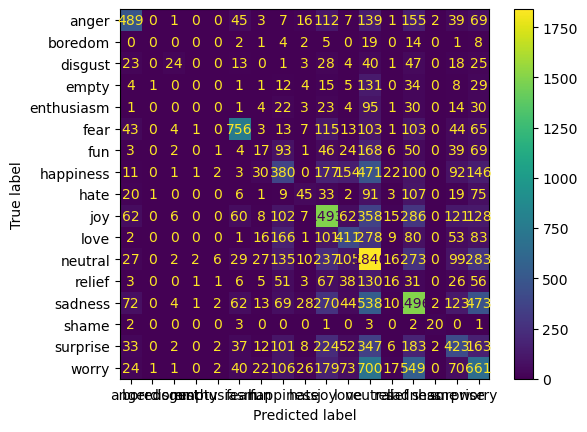

In [52]:
plot_confusion_matrix(lr_classifier, x_test, y_test)

In [53]:
accuracy_score(y_test, lr_y_pred)

0.39610325873576757

### KNN Algorithm

In [54]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [55]:
knn_sample = ['She is in love with her husband']
transform_sample = cv.transform(knn_sample).toarray()

In [56]:
knn_classifier.predict(transform_sample)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['love'], dtype=object)

In [57]:
knn_classifier.score(x_test, y_test)

0.21927758146839418

In [58]:
sentiment_prediction(knn_sample, knn_classifier)

prediction:love, prediction Score:0.4


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'anger': 0.0,
 'boredom': 0.0,
 'disgust': 0.0,
 'empty': 0.0,
 'enthusiasm': 0.0,
 'fear': 0.0,
 'fun': 0.0,
 'happiness': 0.0,
 'hate': 0.0,
 'joy': 0.0,
 'love': 0.4,
 'neutral': 0.4,
 'relief': 0.0,
 'sadness': 0.0,
 'shame': 0.0,
 'surprise': 0.0,
 'worry': 0.2}

In [59]:
knn_y_pred = knn_classifier.predict(x_test)
print(classification_report(y_test, knn_y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.25      0.10      0.14      1085
     boredom       0.00      0.00      0.00        56
     disgust       0.20      0.00      0.01       227
       empty       0.03      0.02      0.03       245
  enthusiasm       0.02      0.01      0.01       228
        fear       0.79      0.19      0.31      1271
         fun       0.11      0.04      0.05       523
   happiness       0.20      0.11      0.14      1590
        hate       0.09      0.02      0.03       412
         joy       0.46      0.13      0.21      2708
        love       0.38      0.21      0.27      1201
     neutral       0.18      0.85      0.30      3091
      relief       0.08      0.01      0.02       434
     sadness       0.41      0.15      0.22      3207
       shame       0.00      0.00      0.00        32
    surprise       0.39      0.02      0.04      1595
       worry       0.21      0.06      0.09      2471

    accuracy              

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


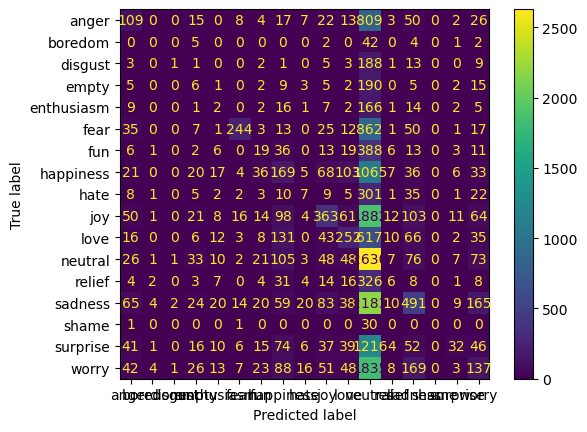

In [60]:
plot_confusion_matrix(knn_classifier, x_test, y_test)

In [61]:
accuracy_score(y_test, knn_y_pred)

0.21927758146839418

### Support Vector Algorithm

In [62]:
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [65]:
svm_sample = ['She is in love with her husband']
transform_sample = cv.transform(svm_sample).toarray()

In [66]:
svm_classifier.predict(transform_sample)

array(['love'], dtype=object)

In [67]:
svm_classifier.score(x_test, y_test)

0.37868080094228507

In [68]:
svm_y_pred = svm_classifier.predict(x_test)
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

       anger       0.50      0.47      0.49      1085
     boredom       0.00      0.00      0.00        56
     disgust       0.34      0.16      0.22       227
       empty       0.02      0.00      0.01       245
  enthusiasm       0.00      0.00      0.00       228
        fear       0.65      0.61      0.63      1271
         fun       0.07      0.05      0.06       523
   happiness       0.26      0.26      0.26      1590
        hate       0.21      0.15      0.17       412
         joy       0.47      0.53      0.50      2708
        love       0.39      0.36      0.37      1201
     neutral       0.33      0.55      0.41      3091
      relief       0.12      0.05      0.07       434
     sadness       0.43      0.42      0.42      3207
       shame       0.72      0.88      0.79        32
    surprise       0.35      0.23      0.28      1595
       worry       0.28      0.23      0.25      2471

    accuracy              

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


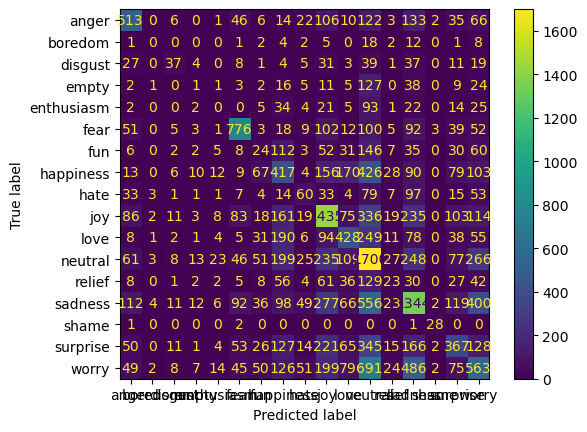

In [69]:
plot_confusion_matrix(svm_classifier, x_test, y_test)

In [70]:
accuracy_score(y_test, svm_y_pred)

0.37868080094228507

### Kernel Support Vector Machine Algorithm

In [63]:
ksvm_classifier = SVC(kernel = 'rbf', random_state = 0)
ksvm_classifier.fit(x_train, y_train)

SVC(random_state=0)

In [71]:
ksvm_sample = ['She is in love with her husband']
transform_sample = cv.transform(ksvm_sample).toarray()

In [72]:
ksvm_classifier.predict(transform_sample)

array(['love'], dtype=object)

In [73]:
ksvm_classifier.score(x_test, y_test)

0.38913427561837455

In [74]:
ksvm_y_pred = ksvm_classifier.predict(x_test)
print(classification_report(y_test, ksvm_y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.75      0.32      0.45      1085
     boredom       0.00      0.00      0.00        56
     disgust       1.00      0.01      0.03       227
       empty       0.00      0.00      0.00       245
  enthusiasm       0.00      0.00      0.00       228
        fear       0.85      0.52      0.64      1271
         fun       0.00      0.00      0.00       523
   happiness       0.29      0.24      0.27      1590
        hate       0.28      0.07      0.12       412
         joy       0.42      0.60      0.50      2708
        love       0.47      0.33      0.39      1201
     neutral       0.33      0.62      0.43      3091
      relief       0.38      0.01      0.02       434
     sadness       0.36      0.51      0.42      3207
       shame       0.78      0.44      0.56        32
    surprise       0.50      0.20      0.29      1595
       worry       0.28      0.24      0.26      2471

    accuracy              

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


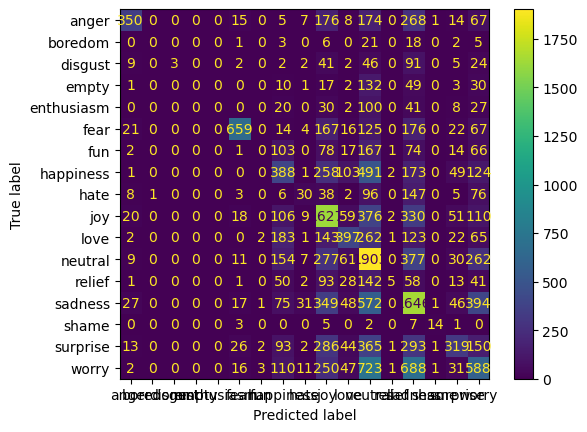

In [75]:
plot_confusion_matrix(ksvm_classifier, x_test, y_test)

In [76]:
accuracy_score(y_test, ksvm_y_pred)

0.38913427561837455

### Naive Bayes Algorithm:


In [77]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [78]:
nb_sample = ['She is scared of her husband']
transform_sample = cv.transform(nb_sample).toarray()

In [79]:
nb_classifier.predict(transform_sample)

array(['sadness'], dtype='<U10')

In [80]:
nb_classifier.score(x_test, y_test)

0.3657243816254417

In [81]:
nb_y_pred = nb_classifier.predict(x_test)
print(classification_report(y_test, nb_y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.72      0.32      0.44      1085
     boredom       0.00      0.00      0.00        56
     disgust       0.50      0.00      0.01       227
       empty       0.00      0.00      0.00       245
  enthusiasm       0.00      0.00      0.00       228
        fear       0.74      0.49      0.59      1271
         fun       0.00      0.00      0.00       523
   happiness       0.31      0.17      0.22      1590
        hate       0.00      0.00      0.00       412
         joy       0.41      0.61      0.49      2708
        love       0.51      0.23      0.31      1201
     neutral       0.34      0.40      0.37      3091
      relief       0.00      0.00      0.00       434
     sadness       0.31      0.59      0.41      3207
       shame       0.00      0.00      0.00        32
    surprise       0.53      0.18      0.26      1595
       worry       0.25      0.35      0.29      2471

    accuracy              

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


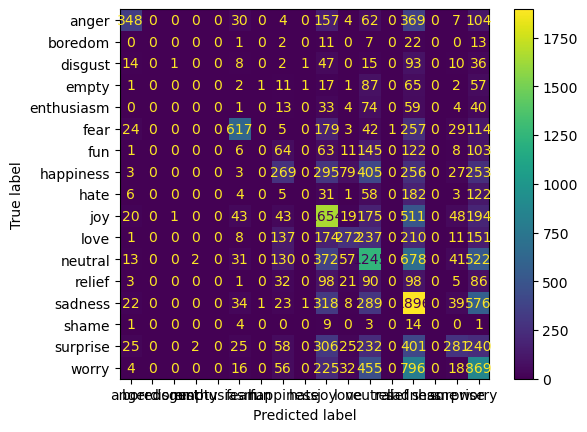

In [82]:
plot_confusion_matrix(nb_classifier, x_test, y_test)

In [83]:
accuracy_score(y_test, nb_y_pred)

0.3657243816254417

### Saving model:
It is observed that Logistic regression generated the highest prediction score and accuracy ration score. hence, it is the model that is best fit for the dataset